# Lasso Regression(L1 Regularisation)

Let's recall the Ridge Regression penalty term **$\lambda \sum_{j=1}^{d}\boldsymbol{\beta_j^2}$** which shrinks all coefficients nearly equal to zero but not exactly to zero. This is the shortcoming of Ridge Regression which generates a model containing all features instead of selecting only those important variables that affect the target/outcome.

The objective of **Lasso**(**L**east **A**bsolute **S**hrinkage and **S**election **O**perator) **Regression** is to find a column matrix or vector $\beta$ that minimizes the SSE and penalty eqvt. to the sum of absolute value of coefficients which can be written as:

$$\text{Cost}_{Lasso}={SSE} + \lambda \sum_{j=1}^{d} \boldsymbol{\mid{\beta_j\mid}} = \sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \lambda \sum_{j=1}^{d} \boldsymbol{\mid{\beta_j\mid}}\\
=\sum_{i=1}^{n}\epsilon_i^2 + \lambda \sum_{j=1}^{d}\boldsymbol{\mid{\beta_j\mid}}$$

It can also be viewed as a minimization problem with argmin or "Argument of Minimum":

$$
\underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}\sum[y_i-\hat{y_i}]=\underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}\sum[y_i-(\beta_{0} + \beta_{1}x_{i1} + \beta_{i2}x_{i2} + \cdots +\beta_{d}x_{id})]
$$

argmin finds the coefficients that minimize the SSE. The lasso constraint is L1 vector norm and its equation is:

$$
||\beta||_1^1={|\beta_{0}| + |\beta_{1}| + |\beta_{2}| + \cdots +|\beta_{d}|}
$$

The lasso loss function with argmin and vector norm is as shown below. Notice that the first term of the equation is the OLS loss function and the second term is the lasso penalty:

$$
\therefore\boldsymbol{\beta_{lasso}} = \underset{\boldsymbol{\beta\in\mathbb{R}}}{\arg\min}||y-X\beta||_2^2+\lambda||\beta||_1^1
$$

Earlier for Ridge Regression, we derived closed form equation but LASSO doesn't have a closed form equation. Still, its solution can be found using convex optimization form.


## Geometrical Interpretation of Lasso Regression

<img src="../../assets/Lasso_Regression.png">

Lasso Regression, also known as **L1 Regularization**, uses the L1 norm (absolute value function) of the parameter estimates as a penalty. The L1 norm is convex but not differentiable and is geometrically represented as a diamond shape when visualizing the constraint $$\sum_{j=1}^{d} |\beta_j| \leq c$$ For $d=2$, this forms the equation $|\beta_1| + |\beta_2| \leq c$, which is diamond-shaped.

In comparison, the term $(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})$ represents the OLS solution, forming an ellipse where the center denotes the least square error (SSE) minimum. The ellipse's contour plot represents increasing SSE values from inner to outer ellipses.

The goal of Lasso Regression is to find the parameter values that minimize the penalized loss function. 

> - When $\lambda=0$, the L1 norm diamond passes through the OLS estimate, which is prone to overfitting. The optimal solution is found by identifying the intersection point of the diamond (L1 norm constraint) and the ellipse (OLS solution). This intersection, called the lasso estimate point, often falls on the axis line due to the sharp contours of the diamond. The corresponding $\lambda$ at this point is the optimal value, reducing overfitting compared to the OLS estimate.</br></br>
> - $L_1$ norm is **Diamond shaped** in 2D space and **Octahedron** shaped in 3D space.

### Coordinate Descent for Lasso Regression

In Lasso Regression, we can't derive closed form equation and perform gradient descent like in Ridge Regression. This is because of 
- term $|\beta|$ and derivative of absolute function of $L_1$ normalization is undefined at $\beta=0$ and 
- $L_1$ normalization being **piecewise linear function** (composed of multiple linear segments, each of which applies to a different range of the input values).

So, we use **Coordinate Descent** for Lasso. The coordinate descent takes one feature at a time and minimizes the cost function. Hence, optimizing the piecewise linear function by reducing the n-dimensional problem to one-dimenstional problem. This helps in isolating $\beta$. 

Mathematically,

$$
\begin{align*}
Cost_{lasso}(\beta) & = SSE_{OLS}(\beta) + \lambda \sum_{j=1}^{d} | \beta_j |
\\
&= \frac{1}{2} \sum_{i=1}^n \left[y_i - \sum_{j=0}^d \beta_j  x_{ij}\right]^2 + \lambda \sum_{j=1}^d |\beta_j|
\end{align*}
$$

Now, we will calculate the gradient term for jth feature by separating the $β$ corresponding to jth feature. For this, we will perform summation with $k≠j$ by separating the beta corresponding to jth feature.

$$
\begin{align*}
\frac{\partial }{\partial \beta_j} SSE_{OLS}(\beta) & = -  \sum_{i=1}^n x_{ij}  \left[y_i - \sum_{j=0}^d \beta_j x_{ij}\right]
\\
& = -  \sum_{i=1}^n x_{ij}  \left[y_i - \sum_{k \neq j}^d \beta_k x_{ik} - \beta_j x_{ij}\right]
\\
& = -  \sum_{i=1}^n x_{ij} \left[y_i - \sum_{k \neq j}^d \beta_k x_{ik} \right] +  \beta_j \sum_{i=1}^n (x_{ij})^2
\\
& \triangleq - \rho_j + \beta_j z_j
\end{align*}
$$

Where, 
- $\rho_j=\sum_{i=1}^n x_{ij} \left[y_i - \sum_{k \neq j}^d \beta_k x_{ik} \right]$ and $\\$
- $z_j$ is constant for normalization.

> Note:
>- When features are normalized, $z_j=1$.

Using the concept of subdifferential as the modulus function $|\beta|$ isn't differentiable at $\beta$=0, we get

\begin{equation*}
\frac{\partial{}}{\partial\beta_j} \lambda \sum_{j=0}^d |\beta_j|  =
\begin{cases}
\ - \lambda \ & \text{if}\ \beta_j < 0 \\
[ - \lambda , \lambda ] & \text{if}\ \beta_j = 0 \\
\ \ \ \ \ \lambda \ & \text{if}\ \beta_j > 0
\end{cases}
\end{equation*}

>#### Statement of the Moreau-Rockafellar Theorem
>
>**Subdifferential**: The subdifferential $\partial f(x)$ of a convex function $f$ at a point $x$ is the set of all vectors $y$ such that:
>
> $$\therefore f(z) \geq f(x) + \langle y, z - x \rangle \quad \text{for all } z \in X
$$

</br>

Combining the differential of two terms using **Moreau-Rockafeller Theorem** and equating the equation to zero to find the minimum, we obtain:

\begin{align*}\partial_{\beta_j} Cost_{lasso}(\beta)  &= \partial_{\beta_j} SSE_{OLS}(\beta) + \partial_{\beta_j} \lambda | \beta_j| \\
0 & = -\rho_j + \beta_j z_j + \partial_{\beta_j} \lambda | \beta_j| \\
0 & = \begin{cases}-\rho_j + \beta_j z_j  - \lambda & \text{if}\ \beta_j < 0 \\
[-\rho_j  - \lambda ,-\rho_j + \lambda ] & \text{if}\ \beta_j = 0 \\
-\rho_j + \beta_j z_j +  \lambda  & \text{if}\ \beta_j >0
\end{cases}
\end{align*}

Solving the above equation, we get:


\begin{align*}
\therefore\beta_j = \begin{cases}\frac{\rho_j + \lambda}{z_j}  & \text{for} \ \rho_j < - \lambda \\
0 & \text{for} \ - \lambda \leq \rho_j \leq \lambda \\
\frac{\rho_j - \lambda}{z_j}  & \text{for} \ \rho_j >\lambda
\end{cases}
\end{align*}

This is considered as soft thresholding function which optimizes the coordinates,
$$\beta_j=\frac{1}{z_j}{\text{S}(\rho_j,\lambda)}$$
where $\frac{1}{z_j}$=1 for normalized features.




### Exercise: Lasso Regreesion

In [1]:
# Import necessary libraries
import numpy as np 
import matplotlib.pyplot as plt 

In [10]:
# Find value of beta through soft thresholding 
def soft_thresholding(rho, lambda_val):
    if rho > lambda_val:
        return rho - lambda_val
    elif rho < -lambda_val:
        return rho + lambda_val
    else:
        return 0
    
# Compare soft thresholding with OLS and plot
x_val = np.arange(-5, 5)
soft_val = [soft_thresholding(item, 1) for item in x_val]

print(x_val)
print(soft_val)

[-5 -4 -3 -2 -1  0  1  2  3  4]
[np.int64(-4), np.int64(-3), np.int64(-2), np.int64(-1), 0, 0, 0, np.int64(1), np.int64(2), np.int64(3)]


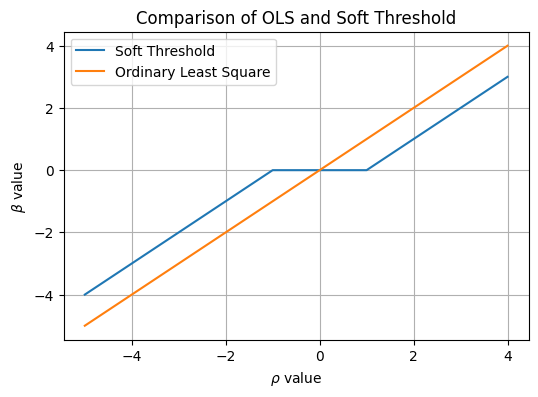

In [3]:
plt.figure(figsize=(6,4))
plt.title('Comparison of OLS and Soft Threshold')
plt.plot(x_val,soft_val,label='Soft Threshold')
plt.plot(x_val,x_val,label='Ordinary Least Square')
plt.xlabel('$\\rho$ value')
plt.ylabel('$\\beta$ value')
plt.legend()
plt.grid(True,linestyle='-');

From above figure,

1. **Soft Thresholding (Blue Line)**:
   - The soft thresholding operator shrinks both positive and negative coefficient values $\beta$ towards zero.
   - For $\rho$ (the predictor variable) in the interval [$- \lambda, \lambda$] the $\beta$ value is set to zero. This is seen as the flat section of the blue line at zero.
   - For $\rho > \lambda$ or $\rho < -\lambda$, the $\beta$ values are not zero but are shrunk towards zero. The blue line follows the path of the orange line (OLS) but shifted towards zero.

2. **Ordinary Least Squares (OLS) (Orange Line)**:
   - The OLS line represents a direct relationship where $\beta$ values change linearly with $\rho$.
   - There's no shrinking of $\beta$ values in OLS, so the line is straight.

### Summary

The soft thresholding operator (used in Lasso regression) modifies the OLS line by:
- Setting $\beta$ to zero when $\rho$ is within the range [$- \lambda, \lambda$].
- Shrinking $\beta$ towards zero for values of $\rho$ outside this range.

This approach helps in feature selection by reducing the influence of less important predictors, promoting sparsity in the model.

## Excercise: Lasso Regression

For implementation of closed form Lasso Regression Equation using the [Boston House Prices Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

It is one of the datasets provided by sklearn. It has _506_ instances with _13_ **numericals/categorical features** of the Boston city. The _medv_ variable is the **target variable**. It is the median value of owner-occupied homes per $1000.


In [4]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [5]:
# Load the dataset
path = "../../assets/Datasets/House-Price.csv"
house = pd.read_csv(path)

house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# Separate feature and target columns
X = house.drop(columns=["MEDV"])
y = house["MEDV"].values.reshape(-1, 1)

# Standardarization of the data i.e Mean=0, Standard Deviation=1
X = (X - X.mean())/X.std()

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [7]:
# Bias/Intercept term to 1 for each samples
X=np.c_[np.ones((len(X), 1)), X]

n = X.shape[0] 
d = X.shape[1] 
print('No of samples:',n,'and No of features:',d)

No of samples: 506 and No of features: 14


In [8]:
# Random initialization of betas
def beta_init(d):
    np.random.seed(0)
    return np.random.randn(d, 1)

beta = beta_init(d)
beta, beta.shape

(array([[ 1.76405235],
        [ 0.40015721],
        [ 0.97873798],
        [ 2.2408932 ],
        [ 1.86755799],
        [-0.97727788],
        [ 0.95008842],
        [-0.15135721],
        [-0.10321885],
        [ 0.4105985 ],
        [ 0.14404357],
        [ 1.45427351],
        [ 0.76103773],
        [ 0.12167502]]),
 (14, 1))

### Coordinate Descent Update Rule


${\hspace{5cm}}$
$\text{Repeat until convergence }$\{
\begin{align*}\\
&\text{For j}=0,1,...,d\\
&\text{Calculate}\ \rho_j = \sum_{i=1}^n x_{ij}  (y_i  - \sum_{k \neq j}^d \beta_k x_{ik} )\\
&\text{Calculate}\ z_j = \sum_{i=1}^n (x_j)^2\\
&\text{Update}\ \beta_j = \frac{1}{z_j} S(\rho_j, \lambda)\\
\end{align*}
${\hspace{8cm}}\}$

In [17]:
# Coordinate Descent Function 
def coordinate_descent(X, y, d, lambda_val=10, max_iter=1000):
    beta = beta_init(d)
    for i in range(max_iter):
        for j in range(0, len(beta)):
            temp_beta = beta.reshape(-1, 1)
            temp_beta[j] = 0.0

            # Rho calculation
            oper = (y - np.dot(X, temp_beta)).reshape(-1, 1)
            rho = np.dot(X[:,j].T, oper)

            # Lamda value
            update_lambda = lambda_val

            # Z_j calculation
            z_j = np.square(X[:,j]).sum()

            # Insert softmax function(soft threshold) and divide by calculated Z_j
            beta[j] = soft_thresholding(rho, update_lambda)/z_j
    
    return beta

In [20]:
# Run coordinate descent
betas = coordinate_descent(X, y, d)

index=['Bias', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

pd.options.display.float_format = "{:,.2f}".format
pd.DataFrame(betas,columns=['Beta value'],index=index).T

,Bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Beta value,22.51,-0.87,1.00,0.00,0.68,-1.93,2.70,0.00,-3.00,2.33,-1.76,-2.02,0.83,-3.73


Here, we can see benifit of using Lasso Regression instead of Ridge Regression. Compared to Ridge, it performed coefficient shrinkage and feature selection by reducing the coefficients of less significant features exactly equal to zero.